EXPLORATORY DATA ANALYSIS (EDA)

In [4]:
import pandas as pd

car_evaluation = '/Users/fermarinsanchez/dev/MaruPython/MODULO 3/Case to solve/car_evaluation.csv'
car_data = pd.read_csv(car_evaluation)

#primeras 5 filas
print(car_data.head())
print("-"*50)
#últimas 5 filas
print(car_data.tail())

   vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc
--------------------------------------------------
     vhigh vhigh.1      2   2.1 small   low  unacc
1722   low     low  5more  more   med   med   good
1723   low     low  5more  more   med  high  vgood
1724   low     low  5more  more   big   low  unacc
1725   low     low  5more  more   big   med   good
1726   low     low  5more  more   big  high  vgood


In [5]:
#Dimensiones del dataframe
print(f"El dataset tiene {car_data.shape[0]} filas y {car_data.shape[1]} columnas")

El dataset tiene 1727 filas y 7 columnas


In [6]:
#Tipo de datos de las columnas
print("TIPOS DE DATOS:")
print()
print(car_data.dtypes)
print("-"*50)
#Información del dataframe
print("INFORMACIÓN DEL DATA FRAME:")
print()
print(car_data.info())

TIPOS DE DATOS:

vhigh      object
vhigh.1    object
2          object
2.1        object
small      object
low        object
unacc      object
dtype: object
--------------------------------------------------
INFORMACIÓN DEL DATA FRAME:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None


In [7]:
car_data.count()

vhigh      1727
vhigh.1    1727
2          1727
2.1        1727
small      1727
low        1727
unacc      1727
dtype: int64

In [8]:
type(car_data)

pandas.core.frame.DataFrame

In [9]:
#ESTADÍSTICA DESCRIPTIVA
car_data.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


RENOMBRAR LAS COLUMNAS

In [11]:
# Renombrar las columnas
car_data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# Verificar el cambio de nombres
print("\nNew column names:")
print(car_data.columns)


New column names:
Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')


In [12]:
print(car_data.head())

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    med  unacc
1  vhigh  vhigh     2       2    small   high  unacc
2  vhigh  vhigh     2       2      med    low  unacc
3  vhigh  vhigh     2       2      med    med  unacc
4  vhigh  vhigh     2       2      med   high  unacc


DATA WRANGLING

In [14]:
#VALORES DUPLICADOS
car_data.duplicated().sum()

0

In [15]:
#VALORES DUPLICADOS
car_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1722    False
1723    False
1724    False
1725    False
1726    False
Length: 1727, dtype: bool

In [16]:
#VALORES UNICOS
car_data.nunique()

buying      4
maint       4
doors       4
persons     3
lug_boot    3
safety      3
class       4
dtype: int64

# CONCLUSIONES:
- El DataFrame es del tipo pandas.core.frame.DataFrame, es decir, es una estructura de datos utilizada por pandas.
- Tiene 1727 entradas con índices que van de o a 1726.
- Tiene un total de 7 columnas, todas son del tipo "object".
- No existen valores nulos con lo que no es necesario hacer limpieza de NaN.
- Dado que todas las columnas son de tipo 'object', si se requiere realizar operaciones numéricas o de modelado, puede ser necesario convertir estos datos a tipos numéricos o categóricos apropiados.
- No existen valores duplicados en el conjunto de datos.
- Cada columna tiene un número determinado de valores definidos que representan diferentes niveles (p.e. Valores únicos en la columna 'buying': ['vhigh' 'high' 'med' 'low'])

In [18]:
# Imprimir los valores únicos de cada columna 
for column in car_data.columns:
    unique_values = car_data[column].unique()
    print(f"Valores únicos en la columna '{column}': {unique_values}")

Valores únicos en la columna 'buying': ['vhigh' 'high' 'med' 'low']
Valores únicos en la columna 'maint': ['vhigh' 'high' 'med' 'low']
Valores únicos en la columna 'doors': ['2' '3' '4' '5more']
Valores únicos en la columna 'persons': ['2' '4' 'more']
Valores únicos en la columna 'lug_boot': ['small' 'med' 'big']
Valores únicos en la columna 'safety': ['med' 'high' 'low']
Valores únicos en la columna 'class': ['unacc' 'acc' 'vgood' 'good']


In [19]:
#Comprobamos los valores nulos
car_data.isnull().sum()

#Comprobamos los valores nulos por columna
car_data.isnull().sum()/len(car_data)*100

#Comprobamos los valores nulos por columna
car_data.isnull().sum()/len(car_data)*100

buying      0.0
maint       0.0
doors       0.0
persons     0.0
lug_boot    0.0
safety      0.0
class       0.0
dtype: float64

VISUALIZACIÓN CON MAPTPLOTLIB / SEABORN

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

car_evaluation = '/Users/fermarinsanchez/dev/MaruPython/MODULO 3/Case to solve/car_evaluation.csv'
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
car_data = pd.read_csv(car_evaluation, header=None, names=column_names)

car_data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


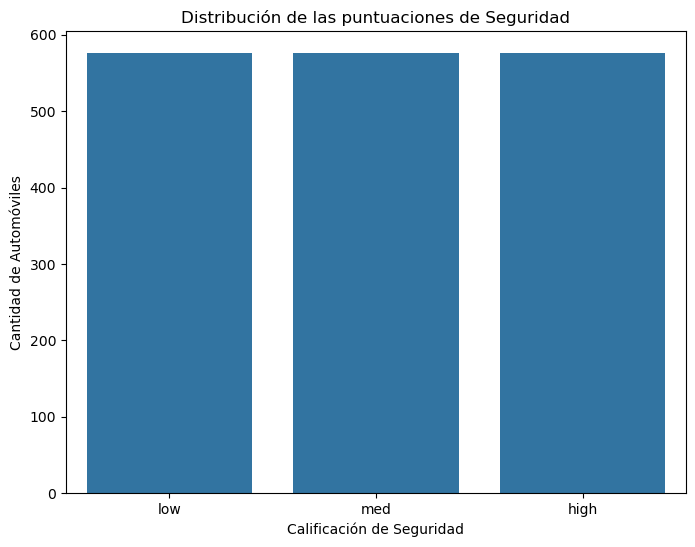

In [22]:
# Visualización 1: Distribución de las puntuaciones de seguridad
plt.figure(figsize=(8, 6))
sns.countplot(x='safety', data=car_data, order=['low', 'med', 'high'])
plt.title('Distribución de las puntuaciones de Seguridad')
plt.xlabel('Calificación de Seguridad')
plt.ylabel('Cantidad de Automóviles')
plt.show()

In [23]:
   print(car_data['safety'].value_counts())

safety
low     576
med     576
high    576
Name: count, dtype: int64


*Conclusión:*
Tanto la gráfica como el conteo indican que la distribución de los valores de seguridad de los vehículos es uniforme.

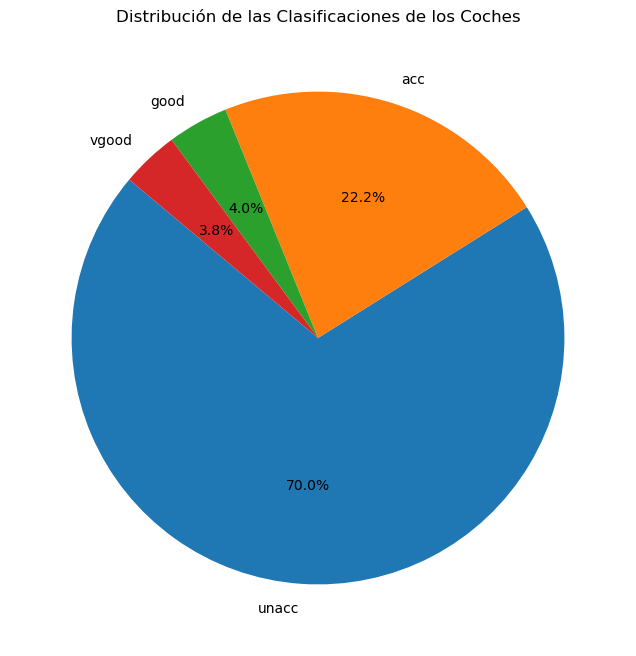

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class_counts = car_data['class'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de las Clasificaciones de los Coches')
plt.show()

*Conclusión:*
Hay un gran número de vehículos en la categoría de "inaceptables" lo que proporciona un elevado margen de mejora dentro de la calidad de los vehículos y la satisfacción del cliente.

In [27]:
print(car_data.head())
print(car_data['buying'].value_counts())
print(car_data['maint'].value_counts())

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc
buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64


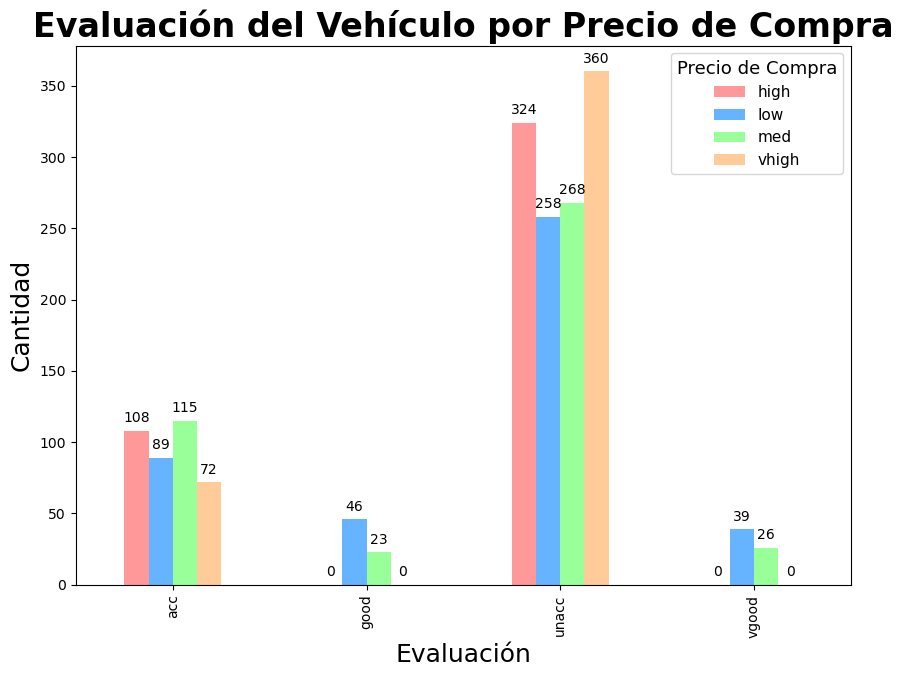

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

grouped_data = car_data.groupby(['class', 'buying']).size().reset_index(name='count')

fig, ax = plt.subplots(figsize=(10, 7))
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']  # Rojo, Azul claro, Verde claro, Naranja claro
grouped_data.pivot(index='class', columns='buying', values='count').plot(kind='bar', ax=ax, color=colors)

ax.set_title('Evaluación del Vehículo por Precio de Compra', fontsize=24, fontweight='bold')
ax.set_xlabel('Evaluación', fontsize=18)
ax.set_ylabel('Cantidad', fontsize=18)
ax.legend(title='Precio de Compra', title_fontsize='13', fontsize='11')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=10, color='black')

plt.show()

*Conclusión:*
Los vehículos más económicos tienen una evaluación más alta contrariamente a la idea de "más caro, mejor"; la relación calidad-precio es mejor.
Predominan los vehículos de la categoría "inaceptables", es decir, que no cumplen con estándares deseables, idependientemente del precio.

In [50]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport

profile = ProfileReport(car_data, title="Car Evaluation Dataset Profiling Report")
profile.to_file("car_evaluation_profile_report.html")

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]